In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
sns.set()

In [2]:
a_train = pd.read_csv('Copy of Training Dataset Capstone.csv')
a_train.shape

(186839, 12)

In [3]:
a_test = pd.read_csv('Copy of Testing Dataset Capstone.csv')
a_test.shape

(59252, 12)

In [4]:
agri = pd.merge(a_train,a_test, how = 'outer')
agri.shape

(246091, 12)

In [5]:
agri.head()

,State Name,City Name,Crop_Year,Season,Crop Name,Area,Production,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,604.2,1.5949,Medium,Low,Low
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,604.2,0.5000,High,High,Moderate
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,604.2,3.1471,Low,Low,Low
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,1381.6,3.6420,Low,Low,Low
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1381.6,0.2292,High,High,Moderate


In [6]:
agri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246091 entries, 0 to 246090
Data columns (total 12 columns):
State Name                        246091 non-null object
City Name                         246091 non-null object
Crop_Year                         246091 non-null int64
Season                            246091 non-null object
Crop Name                         246091 non-null object
Area                              246091 non-null float64
Production                        242361 non-null float64
Rain Fall                         245854 non-null float64
Production
per Area               246091 non-null float64
Input Cost
(High/Medium/Low)      246091 non-null object
Market Price
(High/Medium/Low)    246091 non-null object
Return
(High/Moderate/Low)        246091 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 24.4+ MB


In [7]:
agri_1 = agri.copy()

In [8]:
agri_1.columns

Index(['State Name', 'City Name', 'Crop_Year', 'Season', 'Crop Name', 'Area',
       'Production', 'Rain Fall', 'Production\nper Area',
       'Input Cost\n(High/Medium/Low)', 'Market Price\n(High/Medium/Low)',
       'Return\n(High/Moderate/Low)'],
      dtype='object')

In [9]:
agri1 = agri_1.drop(['City Name','Area','Production'], axis = 1)
agri1.head()

,State Name,Crop_Year,Season,Crop Name,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low)
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,604.2,1.5949,Medium,Low,Low
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,604.2,0.5000,High,High,Moderate
2,Andaman and Nicobar Islands,2000,Kharif,Rice,604.2,3.1471,Low,Low,Low
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,1381.6,3.6420,Low,Low,Low
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,1381.6,0.2292,High,High,Moderate


In [10]:
agri1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246091 entries, 0 to 246090
Data columns (total 9 columns):
State Name                        246091 non-null object
Crop_Year                         246091 non-null int64
Season                            246091 non-null object
Crop Name                         246091 non-null object
Rain Fall                         245854 non-null float64
Production
per Area               246091 non-null float64
Input Cost
(High/Medium/Low)      246091 non-null object
Market Price
(High/Medium/Low)    246091 non-null object
Return
(High/Moderate/Low)        246091 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 18.8+ MB


In [11]:
print(agri1.shape)
print(agri1.columns)

(246091, 9)
Index(['State Name', 'Crop_Year', 'Season', 'Crop Name', 'Rain Fall',
       'Production\nper Area', 'Input Cost\n(High/Medium/Low)',
       'Market Price\n(High/Medium/Low)', 'Return\n(High/Moderate/Low)'],
      dtype='object')


Dropped city name,area,production from the dataset. Now classification of state name,rain fall,crop name, production per area is taken into consideration.

In [12]:
# Classification of Crop Name
## 1. Food Crops
fcrops = ['Rice',"Wheat","Other Kharif pulses","Maize","Other Cereals & Millets","Moong(Green Gram)","Masoor",
     "Arhar/Tur","Urad","Cowpea(Lobia)","Moth","Bajra","Jowar","Ragi","Small millets","Peas & beans (Pulses)",
     "Korra","Gram","other misc. pulses","Samai","Varagu","Pulses total","Paddy","Barley","Khesari","Total foodgrain",
     "Lentil","Jobster","Rajmash Kholar","Ricebean (nagadal)",'Other  Rabi pulses']  
# 2. Cash Crops
ccrops = [ "Sugarcane", "Cotton(lint)", "Tobacco", "Jute", "Soyabean", "Sunflower", "other oilseeds", "Oilseeds total", "Castor seed", "Rapeseed &Mustard", "Black pepper",
     "Groundnut","Linseed", "Sesamum", "Mesta", "Niger seed", "Blackgram", "Sannhamp", "Guar seed", "Cond-spcs other",
     "Kapas","Cardamom","Jute & mesta"] 
# 3. Plantation Crop 
pcrops = ["Coconut", "Tea", "Rubber", "Cashewnut", "Arecanut", "Safflower", "Other Dry Fruit", "Cashewnut Processed", "Cashewnut Raw", "Coffee",
    'Coconut ']  
#4. Horticulture Crops
hcrops = ["Grapes", "Garlic", "Onion", "Other Fresh Fruits", "Other Vegetables", "Papaya", "Potato", "Pineapple", "Orange", "Banana", "Water Melon", "Coriander",
      "Bitter Gourd", "Bhindi", "Bottle Gourd", "Brinjal", "Cabbage", "Carrot", "Cauliflower", "Citrus Fruit", "Jack Fruit", "Pome Fruit", "Redish", "Sweet potato", "Tapioca",
      "Tomato", "Turmeric", "Dry ginger", "Dry chillies", "Horse-gram", "Peas  (vegetable)", "Beans & Mutter(Vegetable)", "Cucumber", "other fibres", "Pome Granet",
      "Ginger", "Turnip", "Sapota", "Lemon", "Colocosia","Bean", "Perilla", 'Arcanut (Processed)', "Atcanut (Raw)", "Drum Stick", "Snak Guard", "Ash Gourd", "Beet Root",
      "Lab-Lab", "Ribed Guard", "Yam", "Pump Kin", "Apple", "Peach", "Pear", "Plums", "Litchi", "Ber", 'Mango', 'Other Citrus Fruit' ]

In [13]:
def crop(name):
    if name in fcrops:
        return("Food Crops")
    elif name in ccrops: 
        return("Cash Crops")
    elif name in pcrops:
        return("Plantation Crops")
    elif name in hcrops:
        return("Horticulture Crops") 
    else:
        return(name)

In [14]:
agri1['Crop_Name_Cat'] = agri1['Crop Name'].apply(crop)
agri1.head()

,State Name,Crop_Year,Season,Crop Name,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low),Crop_Name_Cat
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,604.2,1.5949,Medium,Low,Low,Plantation Crops
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,604.2,0.5000,High,High,Moderate,Food Crops
2,Andaman and Nicobar Islands,2000,Kharif,Rice,604.2,3.1471,Low,Low,Low,Food Crops
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,1381.6,3.6420,Low,Low,Low,Horticulture Crops
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,1381.6,0.2292,High,High,Moderate,Plantation Crops


In [15]:
# Classification of State Name
agri1["Regions"]=agri1["State Name"].map({'Andaman and Nicobar Islands':"East Region",'Andhra Pradesh':"South Region",
                                                "Arunachal Pradesh":"East Region",'Assam':"East Region",'Bihar':"East Region",
                                                'Chandigarh':"North Region",'Dadra and Nagar Haveli':"West Region",
                                                "Goa":"West Region","Gujarat":"West Region",'Haryana':"North Region",
                                                'Himachal Pradesh':"North Region",'Jammu and Kashmir ':"North Region", 
                                                'Jharkhand':"East Region",'Madhya Pradesh':"North Region", 
                                                'Maharashtra':"West Region",'Manipur':"East Region",'Meghalaya':"East Region",
                                                'Mizoram':"East Region",'Nagaland':"East Region",'Odisha':"East Region",'Puducherry'
                                                :"South Region",'Punjab':"North Region",'Rajasthan':"West Region",'Sikkim':"East Region"
                                                ,'Telangana ':"South Region",'Tripura':"East Region",'Uttar Pradesh':"East Region",'Uttarakhand':"North Region",
                                                'Chhattisgarh':"East Region", 'Karnataka':"South Region", 'Kerala':"South Region", 'Tamil Nadu':"South Region", 
                                                'West Bengal':"East Region"})
agri1.head()

,State Name,Crop_Year,Season,Crop Name,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low),Crop_Name_Cat,Regions
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,604.2,1.5949,Medium,Low,Low,Plantation Crops,East Region
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,604.2,0.5000,High,High,Moderate,Food Crops,East Region
2,Andaman and Nicobar Islands,2000,Kharif,Rice,604.2,3.1471,Low,Low,Low,Food Crops,East Region
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,1381.6,3.6420,Low,Low,Low,Horticulture Crops,East Region
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,1381.6,0.2292,High,High,Moderate,Plantation Crops,East Region


In [16]:
# Classification of Rainfall
def rainfall(x) :
    if x<=600 :
        return ("Low Rainfall")
    elif 600 < x <=1200 :
        return ("Average Rainfall")
    else :
        return ("High Rainfall")

In [17]:
agri1["Level_RainFall"]=agri1["Rain Fall"].apply(rainfall)
agri1.head()

,State Name,Crop_Year,Season,Crop Name,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low),Crop_Name_Cat,Regions,Level_RainFall
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,604.2,1.5949,Medium,Low,Low,Plantation Crops,East Region,Average Rainfall
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,604.2,0.5000,High,High,Moderate,Food Crops,East Region,Average Rainfall
2,Andaman and Nicobar Islands,2000,Kharif,Rice,604.2,3.1471,Low,Low,Low,Food Crops,East Region,Average Rainfall
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,1381.6,3.6420,Low,Low,Low,Horticulture Crops,East Region,High Rainfall
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,1381.6,0.2292,High,High,Moderate,Plantation Crops,East Region,High Rainfall


In [18]:
agri1.columns

Index(['State Name', 'Crop_Year', 'Season', 'Crop Name', 'Rain Fall',
       'Production\nper Area', 'Input Cost\n(High/Medium/Low)',
       'Market Price\n(High/Medium/Low)', 'Return\n(High/Moderate/Low)',
       'Crop_Name_Cat', 'Regions', 'Level_RainFall'],
      dtype='object')

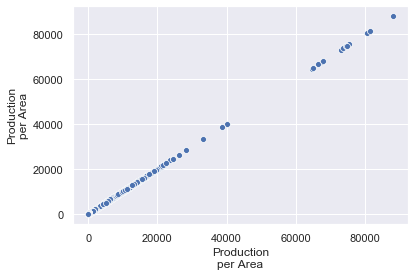

In [19]:
sns.scatterplot(agri1['Production\nper Area'], agri1['Production\nper Area'])
plt.show()

In [20]:
# Dealing with missing and null values
agri1.isnull().sum()

State Name                           0
Crop_Year                            0
Season                               0
Crop Name                            0
Rain Fall                          237
Production\nper Area                 0
Input Cost\n(High/Medium/Low)        0
Market Price\n(High/Medium/Low)      0
Return\n(High/Moderate/Low)          0
Crop_Name_Cat                        0
Regions                              0
Level_RainFall                       0
dtype: int64

In [21]:
agri1.isnull().sum()/agri1.shape[0]*100

State Name                         0.000000
Crop_Year                          0.000000
Season                             0.000000
Crop Name                          0.000000
Rain Fall                          0.096306
Production\nper Area               0.000000
Input Cost\n(High/Medium/Low)      0.000000
Market Price\n(High/Medium/Low)    0.000000
Return\n(High/Moderate/Low)        0.000000
Crop_Name_Cat                      0.000000
Regions                            0.000000
Level_RainFall                     0.000000
dtype: float64

In [22]:
agri1.dropna(axis = 0, inplace = True)

In [23]:
agri1.isnull().sum()

State Name                         0
Crop_Year                          0
Season                             0
Crop Name                          0
Rain Fall                          0
Production\nper Area               0
Input Cost\n(High/Medium/Low)      0
Market Price\n(High/Medium/Low)    0
Return\n(High/Moderate/Low)        0
Crop_Name_Cat                      0
Regions                            0
Level_RainFall                     0
dtype: int64

In [24]:
agri1['Production\nper Area'].describe()

count    245854.000000
mean         41.055665
std         811.759203
min           0.000000
25%           0.500000
50%           1.000000
75%           2.311875
max       88000.000000
Name: Production\nper Area, dtype: float64

In [25]:
agri1['Production\nper Area'].value_counts()

0.0000     7254
1.0000     7089
0.5000     4045
0.3333     1886
2.0000     1674
0.6667     1470
0.2500     1066
0.4000     1054
1.5000     1004
0.6000      984
0.7500      898
3.0000      853
0.8000      767
0.2000      675
1.3333      506
0.8333      493
5.0000      470
0.5714      440
1.2000      424
0.2857      418
0.4286      414
4.0000      382
1.2500      371
1.6667      366
0.1667      354
0.7143      348
2.5000      346
0.3000      344
0.6250      332
0.3750      330
           ... 
5.4795        1
94.0909       1
13.2785       1
5.6255        1
2.7705        1
8.9197        1
4.9500        1
3.6764        1
2.8240        1
3.6233        1
2.3258        1
31.7040       1
91.2070       1
39.9083       1
38.0917       1
9.3300        1
7.8409        1
8.0598        1
2.9652        1
18.7150       1
2.0972        1
4.9350        1
38.3313       1
12.5397       1
3.0232        1
9.5088        1
3.9479        1
44.0917       1
4.8168        1
0.0248        1
Name: Production\nper Ar

In [26]:
a = agri1[agri1['Production\nper Area'] == 0.000000].index

In [27]:
(7000)/258000*100 #so we can drop these rows it will not create much impact 

2.7131782945736433

In [28]:
agri1.drop(index=a,axis=0,inplace=True)

In [29]:
agri1['Production\nper Area'].value_counts()

1.0000     7089
0.5000     4045
0.3333     1886
2.0000     1674
0.6667     1470
0.2500     1066
0.4000     1054
1.5000     1004
0.6000      984
0.7500      898
3.0000      853
0.8000      767
0.2000      675
1.3333      506
0.8333      493
5.0000      470
0.5714      440
1.2000      424
0.2857      418
0.4286      414
4.0000      382
1.2500      371
1.6667      366
0.1667      354
0.7143      348
2.5000      346
0.3000      344
0.6250      332
0.3750      330
0.8571      314
           ... 
7.5964        1
5.4795        1
94.0909       1
12.9796       1
3.6233        1
4.8168        1
2.7705        1
4.9500        1
3.6764        1
2.8240        1
1.7732        1
2.3258        1
13.2785       1
39.9083       1
38.0917       1
7.8409        1
8.0598        1
2.9652        1
9.3300        1
18.7150       1
2.0972        1
38.3313       1
12.5397       1
4.9350        1
3.0232        1
9.5088        1
3.9479        1
44.0917       1
8.9197        1
0.0248        1
Name: Production\nper Ar

In [30]:
agri1['Production\nper Area'].describe()

count    238600.000000
mean         42.303853
std         823.974515
min           0.000100
25%           0.532200
50%           1.000000
75%           2.400000
max       88000.000000
Name: Production\nper Area, dtype: float64

In [31]:
print(agri1['Production\nper Area'].quantile(0.15))
print(agri1['Production\nper Area'].quantile(0.30))
print(agri1['Production\nper Area'].quantile(0.60))
print(agri1['Production\nper Area'].quantile(0.80))
print(agri1['Production\nper Area'].quantile(0.90))
print(agri1['Production\nper Area'].quantile(1))

0.3846
0.6160699999999997
1.3426399999999994
3.176720000000001
10.0
88000.0


In [32]:
# Classification of production per area
prod_labels = ['Very Low Production', 'Low Production', 'Moderate Production', 'High Production','Very High Production', 'Very Very High Production']
prod_bins = [0, 0.38, 0.616 , 1.34, 3.17, 10.0, 88000 ]
agri1['PPA_Labels'] = pd.cut(agri1['Production\nper Area'], bins=prod_bins, labels=prod_labels)
agri1['PPA_Labels'].value_counts()

Moderate Production          71469
High Production              47764
Low Production               36270
Very Low Production          35310
Very High Production         24049
Very Very High Production    23738
Name: PPA_Labels, dtype: int64

In [33]:
agri1.head()

,State Name,Crop_Year,Season,Crop Name,Rain Fall,Production per Area,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low),Crop_Name_Cat,Regions,Level_RainFall,PPA_Labels
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,604.2,1.5949,Medium,Low,Low,Plantation Crops,East Region,Average Rainfall,High Production
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,604.2,0.5000,High,High,Moderate,Food Crops,East Region,Average Rainfall,Low Production
2,Andaman and Nicobar Islands,2000,Kharif,Rice,604.2,3.1471,Low,Low,Low,Food Crops,East Region,Average Rainfall,High Production
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,1381.6,3.6420,Low,Low,Low,Horticulture Crops,East Region,High Rainfall,Very High Production
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,1381.6,0.2292,High,High,Moderate,Plantation Crops,East Region,High Rainfall,Very Low Production


In [34]:
agri1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238600 entries, 0 to 246090
Data columns (total 13 columns):
State Name                        238600 non-null object
Crop_Year                         238600 non-null int64
Season                            238600 non-null object
Crop Name                         238600 non-null object
Rain Fall                         238600 non-null float64
Production
per Area               238600 non-null float64
Input Cost
(High/Medium/Low)      238600 non-null object
Market Price
(High/Medium/Low)    238600 non-null object
Return
(High/Moderate/Low)        238600 non-null object
Crop_Name_Cat                     238600 non-null object
Regions                           238600 non-null object
Level_RainFall                    238600 non-null object
PPA_Labels                        238600 non-null category
dtypes: category(1), float64(2), int64(1), object(9)
memory usage: 23.9+ MB


In [35]:
agri_2 = agri1.copy()
agri_2.columns

Index(['State Name', 'Crop_Year', 'Season', 'Crop Name', 'Rain Fall',
       'Production\nper Area', 'Input Cost\n(High/Medium/Low)',
       'Market Price\n(High/Medium/Low)', 'Return\n(High/Moderate/Low)',
       'Crop_Name_Cat', 'Regions', 'Level_RainFall', 'PPA_Labels'],
      dtype='object')

In [36]:
agri2 = agri_2.drop(['State Name','Crop Name','Rain Fall','Production\nper Area'], axis = 1)
agri2.head()

,Crop_Year,Season,Input Cost (High/Medium/Low),Market Price (High/Medium/Low),Return (High/Moderate/Low),Crop_Name_Cat,Regions,Level_RainFall,PPA_Labels
0,2000,Kharif,Medium,Low,Low,Plantation Crops,East Region,Average Rainfall,High Production
1,2000,Kharif,High,High,Moderate,Food Crops,East Region,Average Rainfall,Low Production
2,2000,Kharif,Low,Low,Low,Food Crops,East Region,Average Rainfall,High Production
3,2000,Whole Year,Low,Low,Low,Horticulture Crops,East Region,High Rainfall,Very High Production
4,2000,Whole Year,High,High,Moderate,Plantation Crops,East Region,High Rainfall,Very Low Production


In [37]:
agri2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238600 entries, 0 to 246090
Data columns (total 9 columns):
Crop_Year                         238600 non-null int64
Season                            238600 non-null object
Input Cost
(High/Medium/Low)      238600 non-null object
Market Price
(High/Medium/Low)    238600 non-null object
Return
(High/Moderate/Low)        238600 non-null object
Crop_Name_Cat                     238600 non-null object
Regions                           238600 non-null object
Level_RainFall                    238600 non-null object
PPA_Labels                        238600 non-null category
dtypes: category(1), int64(1), object(7)
memory usage: 16.6+ MB


In [38]:
# Changing datatype of columns
agri2['Crop_Year'] = agri2['Crop_Year'].astype('object')
agri2['PPA_Labels'] = agri2['PPA_Labels'].astype('object')

In [40]:
print(agri2.columns)
print(agri2.shape)
print(agri2.info())

Index(['Crop_Year', 'Season', 'Input Cost\n(High/Medium/Low)',
       'Market Price\n(High/Medium/Low)', 'Return\n(High/Moderate/Low)',
       'Crop_Name_Cat', 'Regions', 'Level_RainFall', 'PPA_Labels'],
      dtype='object')
(238600, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 238600 entries, 0 to 246090
Data columns (total 9 columns):
Crop_Year                         238600 non-null object
Season                            238600 non-null object
Input Cost
(High/Medium/Low)      238600 non-null object
Market Price
(High/Medium/Low)    238600 non-null object
Return
(High/Moderate/Low)        238600 non-null object
Crop_Name_Cat                     238600 non-null object
Regions                           238600 non-null object
Level_RainFall                    238600 non-null object
PPA_Labels                        238600 non-null object
dtypes: object(9)
memory usage: 18.2+ MB
None


In [41]:
# Replacing Values of Return
agri2['Return\n(High/Moderate/Low)'] = agri2['Return\n(High/Moderate/Low)'].replace({'Low':0, 'Moderate':1}).astype('int')
agri2['Return\n(High/Moderate/Low)'].value_counts()

1    152068
0     86532
Name: Return\n(High/Moderate/Low), dtype: int64

In [43]:
# Performing Chi-Square tests with newly formed columns and target variable return
chi2,pvalue1,dof,obs=stats.chi2_contingency(pd.crosstab(agri2['Return\n(High/Moderate/Low)'],[agri2["Level_RainFall"]]))
chi2,pvalue2,dof,obs=stats.chi2_contingency(pd.crosstab(agri2['Return\n(High/Moderate/Low)'],[agri2['Input Cost\n(High/Medium/Low)']]))
chi2,pvalue3,dof,expe=stats.chi2_contingency(pd.crosstab(agri2['Return\n(High/Moderate/Low)'],[agri2['Market Price\n(High/Medium/Low)']]))
chi2,pvalue4,dof,expe=stats.chi2_contingency(pd.crosstab(agri2['Return\n(High/Moderate/Low)'],agri2['Crop_Year']))
chi2,pvalue5,dof,expe=stats.chi2_contingency(pd.crosstab(agri2['Return\n(High/Moderate/Low)'],agri2['Season']))
chi2,pvalue6,dof,expe=stats.chi2_contingency(pd.crosstab(agri2['Return\n(High/Moderate/Low)'],agri2['Crop_Name_Cat']))
chi2,pvalue7,dof,expe=stats.chi2_contingency(pd.crosstab(agri2['Return\n(High/Moderate/Low)'],agri2['Regions']))
chi2,pvalue8,dof,expe=stats.chi2_contingency(pd.crosstab(agri2['Return\n(High/Moderate/Low)'],agri2['PPA_Labels']))

In [45]:
chisq_val=pd.DataFrame({"Chisq_Pvalues":[pvalue1,pvalue2,pvalue3,pvalue4,pvalue5,pvalue6,pvalue7,pvalue8]},index=["Return vs Level_Rainfall","Return vs Input_Cost","Return vs Market_Price","Return vs Crop_Year","Return vs Season","Return vs Crop_Name_Cat","Return vs Regions","Return vs PPA_Labels"])

In [46]:
chisq_val.sort_values(by="Chisq_Pvalues",ascending=False)

,Chisq_Pvalues
Return vs Level_Rainfall,5.405581e-177
Return vs Crop_Year,4.938032e-232
Return vs Input_Cost,0.000000e+00
Return vs Market_Price,0.000000e+00
Return vs Season,0.000000e+00
Return vs Crop_Name_Cat,0.000000e+00
Return vs Regions,0.000000e+00
Return vs PPA_Labels,0.000000e+00


In [47]:
agri3 = pd.get_dummies(agri2, drop_first=True)
agri3.head()

,Return (High/Moderate/Low),Crop_Year_1998,Crop_Year_1999,Crop_Year_2000,Crop_Year_2001,Crop_Year_2002,Crop_Year_2003,Crop_Year_2004,Crop_Year_2005,Crop_Year_2006,...,Regions_North Region,Regions_South Region,Regions_West Region,Level_RainFall_High Rainfall,Level_RainFall_Low Rainfall,PPA_Labels_Low Production,PPA_Labels_Moderate Production,PPA_Labels_Very High Production,PPA_Labels_Very Low Production,PPA_Labels_Very Very High Production
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [48]:
agri3.shape

(238600, 41)

In [49]:
agri3.columns

Index(['Return\n(High/Moderate/Low)', 'Crop_Year_1998', 'Crop_Year_1999',
       'Crop_Year_2000', 'Crop_Year_2001', 'Crop_Year_2002', 'Crop_Year_2003',
       'Crop_Year_2004', 'Crop_Year_2005', 'Crop_Year_2006', 'Crop_Year_2007',
       'Crop_Year_2008', 'Crop_Year_2009', 'Crop_Year_2010', 'Crop_Year_2011',
       'Crop_Year_2012', 'Crop_Year_2013', 'Crop_Year_2014', 'Crop_Year_2015',
       'Season_Kharif     ', 'Season_Rabi       ', 'Season_Summer     ',
       'Season_Whole Year ', 'Season_Winter     ',
       'Input Cost\n(High/Medium/Low)_Low',
       'Input Cost\n(High/Medium/Low)_Medium',
       'Market Price\n(High/Medium/Low)_Low',
       'Market Price\n(High/Medium/Low)_Medium', 'Crop_Name_Cat_Food Crops',
       'Crop_Name_Cat_Horticulture Crops', 'Crop_Name_Cat_Plantation Crops',
       'Regions_North Region', 'Regions_South Region', 'Regions_West Region',
       'Level_RainFall_High Rainfall', 'Level_RainFall_Low Rainfall',
       'PPA_Labels_Low Production', 'PPA_Labels

In [50]:
# Spilitting the dataset
X = agri3.drop(['Return\n(High/Moderate/Low)'], axis = 1)
y = agri3['Return\n(High/Moderate/Low)']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [53]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(167020, 40)
(71580, 40)
(167020,)
(71580,)


In [54]:
# Applying Standard Scaler to Train and Test Dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc_Xtrain = pd.DataFrame(sc.fit_transform(Xtrain), columns = Xtrain.columns)
sc_Xtest = pd.DataFrame(sc.fit_transform(Xtest), columns = Xtest.columns)

In [55]:
from scipy.stats import ttest_1samp

In [58]:
#H0 ==> Population mu = Sample Mu
# H1 ==> Population mu =! Sample Mu
# assuming alpha = 0.05
tstats, pvalue_train = ttest_1samp(Xtrain,X.mean())
tstats, pvalue_test = ttest_1samp(Xtest,X.mean())
print(pvalue_train)
print('--'*15)
print(pvalue_test)

[0.60060207 0.84980809 0.87733181 0.64047658 0.80199083 0.62813494
 0.74672767 0.81854105 0.22616613 0.90712321 0.53644321 0.66687832
 0.70457023 0.43546122 0.33477351 0.5592802  0.39814606 0.7327918
 0.9784135  0.45745574 0.53794705 0.78023371 0.98758288 0.66618263
 0.85274728 0.7723861  0.76197147 0.6905836  0.42233909 0.62837533
 0.54449087 0.77879764 0.94004375 0.67475019 0.41921676 0.60493114
 0.55188742 0.5078379  0.59616763 0.51717105]
------------------------------
[0.42807659 0.77168854 0.81404982 0.47885796 0.70271616 0.46249496
 0.62351172 0.72505676 0.05958492 0.85880309 0.34045408 0.50802692
 0.56474963 0.22786863 0.14672638 0.37677412 0.19003329 0.61209386
 0.96703324 0.25492442 0.35117406 0.67043027 0.98102639 0.51062165
 0.77678414 0.6588148  0.64376057 0.54319545 0.22248412 0.45426873
 0.35233823 0.66740038 0.90858937 0.52266619 0.21646368 0.42750558
 0.36448679 0.31520842 0.41624751 0.31903264]


In [59]:
# Thus all the p values are greater than 0.05, thus we can clearly say that our sample is derived from the population.

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
lr = LogisticRegression()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
dt_boost = AdaBoostClassifier()

In [61]:
models = []
models.append(("logistic", lr))
models.append(("Naive Base", nb))
models.append(("Decision Tree", dt))
models.append(("Random Forest", rf))
models.append(("gb", gb))
models.append(("dt_boost", dt_boost))

In [63]:
results=[]
results_test = []
names =[]
for name, model, in models:
    model.fit(sc_Xtrain,ytrain).predict(sc_Xtest)
    cv_results_train = model.score(sc_Xtrain,ytrain)
    cv_results_test =  model.score(sc_Xtest,ytest)
    results.append(cv_results_train)
    results_test.append(cv_results_test)
    names.append(name)
    print("Training %s: %f (%f) (%f)" %(name,np.mean(cv_results_train),np.var(cv_results_train, ddof=1),(1-np.mean(cv_results_train))))
    print("Testing %s: %f (%f) (%f)" %(name,np.mean(cv_results_test),np.var(cv_results_test, ddof=1),(1-np.mean(cv_results_test))))


C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3364: RuntimeWarning: Degrees of freedom <= 0 for slice
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Training logistic: 0.901209 (nan) (0.098791)
Testing logistic: 0.901243 (nan) (0.098757)


C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3364: RuntimeWarning: Degrees of freedom <= 0 for slice
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Training Naive Base: 0.895438 (nan) (0.104562)
Testing Naive Base: 0.894887 (nan) (0.105113)


C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3364: RuntimeWarning: Degrees of freedom <= 0 for slice
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Training Decision Tree: 0.927087 (nan) (0.072913)
Testing Decision Tree: 0.914459 (nan) (0.085541)


C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3364: RuntimeWarning: Degrees of freedom <= 0 for slice
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Training Random Forest: 0.926679 (nan) (0.073321)
Testing Random Forest: 0.914417 (nan) (0.085583)


C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3364: RuntimeWarning: Degrees of freedom <= 0 for slice
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Training gb: 0.908430 (nan) (0.091570)
Testing gb: 0.907502 (nan) (0.092498)
Training dt_boost: 0.901209 (nan) (0.098791)
Testing dt_boost: 0.901243 (nan) (0.098757)


C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3364: RuntimeWarning: Degrees of freedom <= 0 for slice
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Training Accuracy logistic: 0.901279 Variance Error(0.000005) Bias Error(0.098721)
Testing Accuracy logistic: 0.901307 Variance Error(0.000024) Bias Error(0.098693)
Training Accuracy Naive Base: 0.895200 Variance Error(0.000007) Bias Error(0.104800)
Testing Accuracy Naive Base: 0.894608 Variance Error(0.000023) Bias Error(0.105392)
Training Accuracy Decision Tree: 0.914766 Variance Error(0.000002) Bias Error(0.085234)
Testing Accuracy Decision Tree: 0.908391 Variance Error(0.000019) Bias Error(0.091609)
Training Accuracy Random Forest: 0.915036 Variance Error(0.000002) Bias Error(0.084964)
Testing Accuracy Random Forest: 0.908423 Variance Error(0.000017) Bias Error(0.091577)
Training Accuracy gb: 0.908727 Variance Error(0.000006) Bias Error(0.091273)
Testing Accuracy gb: 0.907480 Variance Error(0.000015) Bias Error(0.092520)
Training Accuracy dt_boost: 0.901279 Variance Error(0.000005) Bias Error(0.098721)
Testing Accuracy dt_boost: 0.901278 Variance Error(0.000024) Bias Error(0.098722

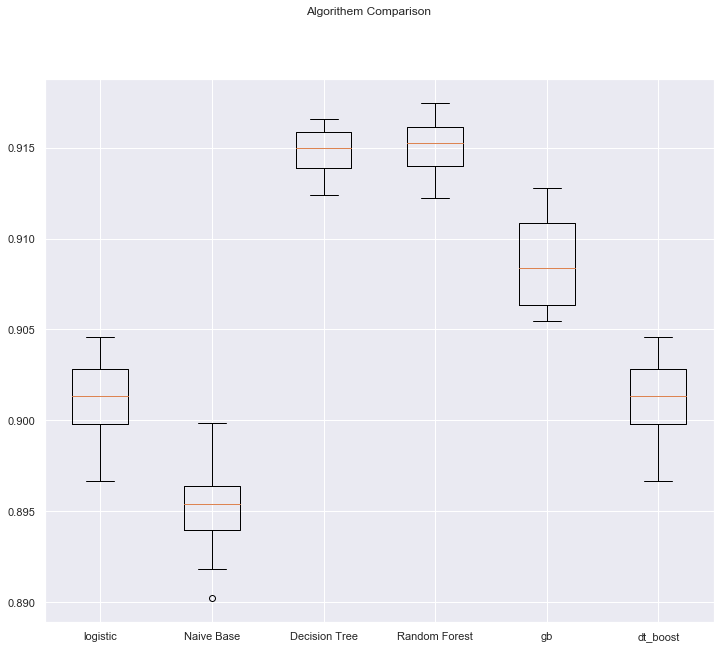

In [64]:
# lets try with kfold
from sklearn import model_selection
results=[]
results_test = []
names =[]
for name, model, in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=15,random_state=0)
    cv_results_train = model_selection.cross_val_score(model,sc_Xtrain,ytrain,cv = kfold,scoring="f1_weighted")
    cv_results_test =  model_selection.cross_val_score(model,sc_Xtest,ytest,cv = kfold,scoring="f1_weighted")
    results.append(cv_results_train)
    results_test.append(cv_results_test)
    names.append(name)
    print("Training Accuracy %s: %f Variance Error(%f) Bias Error(%f)" %(name,np.mean(cv_results_train),np.var(cv_results_train, ddof=1),(1-np.mean(cv_results_train))))
    print("Testing Accuracy %s: %f Variance Error(%f) Bias Error(%f)" %(name,np.mean(cv_results_test),np.var(cv_results_test, ddof=1),(1-np.mean(cv_results_test))))
    
fig = plt.figure(figsize=(12,10))
fig.suptitle("Algorithem Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Decison tree with both the model selection technique is coming on a higher side with less of bias and variance, now lets try with other metric scores.

In [125]:
from sklearn.metrics import cohen_kappa_score

In [126]:
a = dt.fit(sc_Xtrain,ytrain)
ypred = a.predict(sc_Xtest)

In [127]:
print('Training Accuracy', dt.score(sc_Xtrain,ytrain))
print('Testing Accuracy', dt.score(sc_Xtest,ytest))
print('Cohens Kappa Score', cohen_kappa_score(ytest,ypred))

Training Accuracy 0.9270865764579093
Testing Accuracy 0.914473316568874
Cohens Kappa Score 0.8158044680886372


In [128]:
b = rf.fit(sc_Xtrain,ytrain)
ypred_rf = b.predict(sc_Xtest)

In [129]:
print('Training Accuracy', rf.score(sc_Xtrain,ytrain))
print('Testing Accuracy', rf.score(Xtest,ytest))
print('Cohens Kappa Score', cohen_kappa_score(ytest,ypred_rf))

Training Accuracy 0.9265477188360676
Testing Accuracy 0.8930148086057558
Cohens Kappa Score 0.8151877089031727


In [130]:
c = gb.fit(sc_Xtrain,ytrain)
ypred_gb = c.predict(sc_Xtest)

In [131]:
print('Training Accuracy', gb.score(sc_Xtrain,ytrain))
print('Testing Accuracy', gb.score(sc_Xtest,ytest))
print('Cohens Kappa Score', cohen_kappa_score(ytest,ypred_gb))

Training Accuracy 0.9084301281283679
Testing Accuracy 0.9075020955574182
Cohens Kappa Score 0.8021269828815988


In [132]:
d = dt_boost.fit(sc_Xtrain,ytrain)
ypred_dt_boost = d.predict(sc_Xtest)

In [133]:
print('Training Accuracy', dt_boost.score(sc_Xtrain,ytrain))
print('Testing Accuracy', dt_boost.score(sc_Xtest,ytest))
print('Cohens Kappa Score', cohen_kappa_score(ytest,ypred_dt_boost))

Training Accuracy 0.9012094359956891
Testing Accuracy 0.9012433640681755
Cohens Kappa Score 0.7868867238746919


### Cohens kappa matrix is best of Decision Tree only 

In [77]:
from sklearn.metrics import classification_report

In [78]:
print('Decision Tree', '--'*15)
print(classification_report(ytest,ypred))
print('Random forest', '--'*15)
print(classification_report(ytest,ypred_rf))
print('Gradient Boosting', '--'*15)
print(classification_report(ytest,ypred_gb))
print('DT Boosting', '--'*15)
print(classification_report(ytest,ypred_dt_boost))

Decision Tree ------------------------------
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     26030
           1       0.94      0.93      0.93     45550

    accuracy                           0.91     71580
   macro avg       0.91      0.91      0.91     71580
weighted avg       0.91      0.91      0.91     71580

Random forest ------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     26030
           1       0.93      0.93      0.93     45550

    accuracy                           0.91     71580
   macro avg       0.91      0.91      0.91     71580
weighted avg       0.91      0.91      0.91     71580

Gradient Boosting ------------------------------
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     26030
           1       0.94      0.91      0.93     45550

    accuracy                           0.91

### Our Classification metric also support descision tree

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
print('Decision Tree')
print(confusion_matrix(ytest,ypred))
print('Random forest')
print(confusion_matrix(ytest,ypred_rf))
print('Gradient Boosting')
print(confusion_matrix(ytest,ypred_gb))
print('DT Boosting')
print(confusion_matrix(ytest,ypred_dt_boost))

Decision Tree
[[23169  2861]
 [ 3264 42286]]
Random forest
[[22974  3056]
 [ 3086 42464]]
Gradient Boosting
[[23329  2701]
 [ 3920 41630]]
DT Boosting
[[22572  3458]
 [ 3611 41939]]


### Confusion Matrix clearly states that with decison tree no.of fn and fp is less,in comparison to others.

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [83]:
yprob = dt.predict_proba(sc_Xtest)[:,1]

Decison Tree ROC_AUC Curve


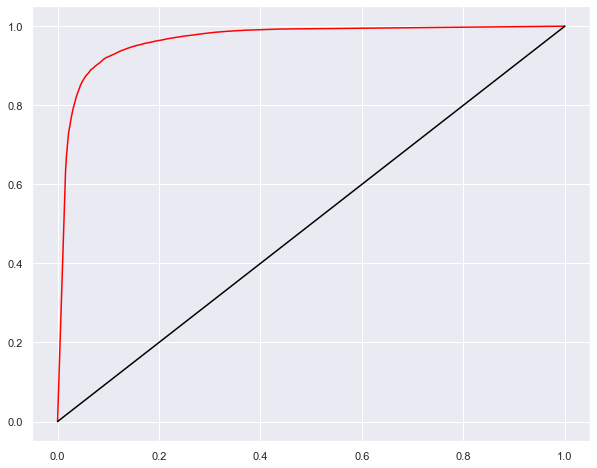

In [84]:
print('Decison Tree ROC_AUC Curve')
plt.figure(figsize=(10,8))
fpr, tpr, threshold = roc_curve(ytest,yprob)
plt.plot(fpr,tpr,color = "red")
plt.plot(fpr,fpr, color = "black")
plt.show()

In [85]:
print(roc_auc_score(ytest,ypred))

0.9092154201877172


In [87]:
yprob_rf = rf.predict_proba(sc_Xtest)[:,1]

Random Forest ROC_AUC Curve


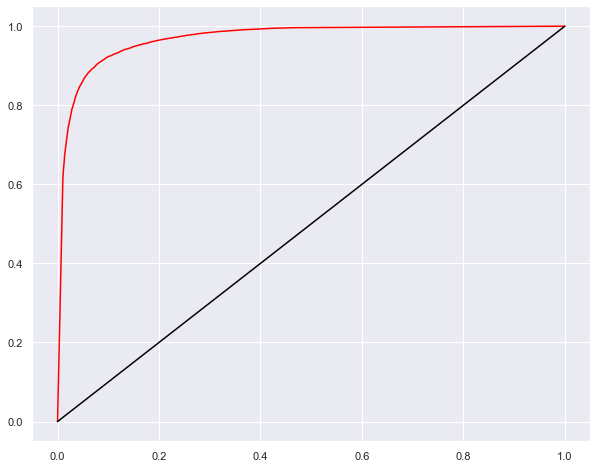

In [88]:
print('Random Forest ROC_AUC Curve')
plt.figure(figsize=(10,8))
fpr, tpr, threshold = roc_curve(ytest,yprob_rf)
plt.plot(fpr,tpr,color = "red")
plt.plot(fpr,fpr, color = "black")
plt.show()

In [89]:
print(roc_auc_score(ytest,ypred_rf))

0.9074236389406296


In [90]:
yprob_gb = gb.predict_proba(sc_Xtest)[:,1]

Gradient Boosting ROC_AUC Curve


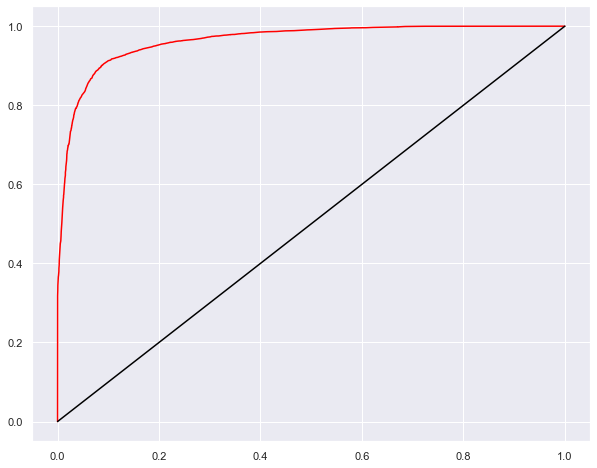

In [91]:
print('Gradient Boosting ROC_AUC Curve')
plt.figure(figsize=(10,8))
fpr, tpr, threshold = roc_curve(ytest,yprob_gb)
plt.plot(fpr,tpr,color = "red")
plt.plot(fpr,fpr, color = "black")
plt.show()

In [92]:
print(roc_auc_score(ytest,ypred_gb))

0.9050879189046837


In [94]:
yprob_dt_boost = dt_boost.predict_proba(sc_Xtest)[:,1]

Dt Boost ROC_AUC Curve


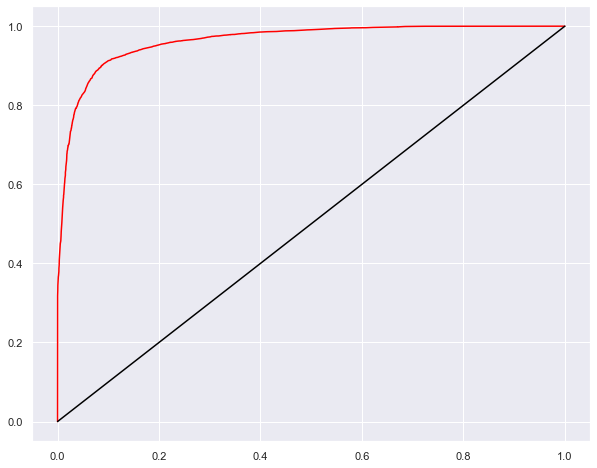

In [95]:
print('Dt Boost ROC_AUC Curve')
plt.figure(figsize=(10,8))
fpr, tpr, threshold = roc_curve(ytest,yprob_gb)
plt.plot(fpr,tpr,color = "red")
plt.plot(fpr,fpr, color = "black")
plt.show()

In [96]:
print(roc_auc_score(ytest,ypred_dt_boost))

0.8939388816332419


### ROC AUC also states that Decision tree is performing best amongst all and we can clearly say decision tree is performing best.

In [97]:
# Let us do some hyperparameter tuning

In [98]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [99]:
params = {"max_depth" : [2,4,5,6,7,8],   
         "max_features":["auto", "sqrt", "log2"],'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [2,3,4,5],
         'min_samples_leaf': [1,2,3,4,5], 'random_state' : [0,123,234,1,5,7,9,10,45]}

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10, shuffle= True)

In [102]:
random_cv = RandomizedSearchCV(estimator=dt,param_distributions=params, cv=kfold, n_iter=25, 
scoring = "f1_weighted",random_state=42)
random_cv.fit(sc_Xtrain, ytrain)
print(random_cv.best_params_)

C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADITYA GUPTA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ADITYA GUPTA\Anaconda3\

{'random_state': 7, 'min_samples_leaf': 1, 'max_leaf_nodes': 5, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'gini'}


In [103]:
dt_tuned = DecisionTreeClassifier(random_state = 123, min_samples_leaf = 3, max_leaf_nodes = 5, max_features = 'sqrt', max_depth = 7, criterion = 'entropy')

In [106]:
dt_tuned.fit(sc_Xtrain,ytrain).predict(sc_Xtest)
print(dt_tuned.score(sc_Xtrain,ytrain))
print(dt_tuned.score(sc_Xtest,ytest))

0.8406238773799545
0.8400391170718078


In [107]:
dt_tuned = DecisionTreeClassifier(random_state = 123, min_samples_leaf = 3,  max_features = 'sqrt', max_depth = 7, criterion = 'entropy')

In [108]:
dt_tuned.fit(sc_Xtrain,ytrain).predict(sc_Xtest)
print(dt_tuned.score(sc_Xtrain,ytrain))
print(dt_tuned.score(sc_Xtest,ytest))

0.8928511555502335
0.8916037999441184


### Tuning is not making any sense to data.

In [109]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


'C:\Users\ADITYA' is not recognized as an internal or external command,
operable program or batch file.


In [111]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(dt, 
           k_features=Xtrain.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)
sfs1 = sfs1.fit(Xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.0s finished

[2020-01-27 22:01:50] Features: 1/40 -- score: 0.9012094359956891[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.3s finished

[2020-01-27 22:01:51] Features: 2/40 -- score: 0.9012094359956891[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.5s finished

[2020-01-27 22:01:53] Features: 3/40 -- score: 0.9012333852233265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    6.3s finished

[2020-01-27 22:04:22] Features: 29/40 -- score: 0.9232008142737397[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    5.9s finished

[2020-01-27 22:04:28] Features: 30/40 -- score: 0.9237576338163094[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.5s finished

[2020-01-27 22:04:34] Features: 31/40 -- score: 0.9244521614177943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done

In [112]:
sfs1.subsets_

{1: {'feature_idx': (25,),
  'cv_scores': array([0.90120944]),
  'avg_score': 0.9012094359956891,
  'feature_names': ('Market Price\n(High/Medium/Low)_Low',)},
 2: {'feature_idx': (0, 25),
  'cv_scores': array([0.90120944]),
  'avg_score': 0.9012094359956891,
  'feature_names': ('Crop_Year_1998', 'Market Price\n(High/Medium/Low)_Low')},
 3: {'feature_idx': (0, 25, 29),
  'cv_scores': array([0.90123339]),
  'avg_score': 0.9012333852233265,
  'feature_names': ('Crop_Year_1998',
   'Market Price\n(High/Medium/Low)_Low',
   'Crop_Name_Cat_Plantation Crops')},
 4: {'feature_idx': (0, 25, 29, 33),
  'cv_scores': array([0.90285595]),
  'avg_score': 0.902855945395761,
  'feature_names': ('Crop_Year_1998',
   'Market Price\n(High/Medium/Low)_Low',
   'Crop_Name_Cat_Plantation Crops',
   'Level_RainFall_High Rainfall')},
 5: {'feature_idx': (0, 21, 25, 29, 33),
  'cv_scores': array([0.90362831]),
  'avg_score': 0.9036283079870674,
  'feature_names': ('Crop_Year_1998',
   'Season_Whole Year ',
  

In [113]:
# here by choosing all the features we are getting the best accuracy 

In [114]:
from sklearn.feature_selection import RFE
rfe = RFE(dt,15)
x_rfe = rfe.fit_transform(Xtrain,ytrain)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True False False False False False False
 False False False False  True False  True False  True  True False False
  True  True False  True  True  True False  True False  True  True False
 False  True False  True]
[ 9  8 13 11  7  1 12 17 19 21 23 16 18  2 10  4  1 26  1 14  1  1 25 24
  1  1 22  1  1  1  6  1  5  1  1  3 20  1 15  1]


In [115]:
s = pd.DataFrame(rfe.ranking_)
s[1] = Xtrain.columns
s[s[0] == 1]

,0,1
5,1,Crop_Year_2003
16,1,Crop_Year_2014
18,1,Season_Kharif
20,1,Season_Summer
21,1,Season_Whole Year
24,1,Input Cost\n(High/Medium/Low)_Medium
25,1,Market Price\n(High/Medium/Low)_Low
27,1,Crop_Name_Cat_Food Crops
28,1,Crop_Name_Cat_Horticulture Crops
29,1,Crop_Name_Cat_Plantation Crops


In [123]:
x = X

In [124]:
rfe_x = x[['Crop_Year_2003','Crop_Year_2014','Season_Kharif','Season_Summer','Season_Whole Year','Input Cost\n(High/Medium/Low)_Medium',
  'Market Price\n(High/Medium/Low)_Low','Crop_Name_Cat_Food Crops','Crop_Name_Cat_Horticulture Crops','Crop_Name_Cat_Plantation Crops',
  'Regions_South Region','Level_RainFall_High Rainfall','Level_RainFall_Low Rainfall',
  'PPA_Labels_Very High Production','PPA_Labels_Very Very High Production']]

KeyError: "['Season_Whole Year', 'Season_Kharif', 'Season_Summer'] not in index"

In [121]:
x1train,x1test,y1train,y1test = train_test_split(rfe_x,y, test_size=0.30, random_state=2)
sc1 = StandardScaler()
scaled_rfe_train= pd.DataFrame(sc1.fit_transform(x1train), columns=x1train.columns)
scaled_rfe_test= pd.DataFrame(sc1.transform(x1test), columns=x1test.columns)

NameError: name 'rfe_x' is not defined

In [122]:
# lets try with kfold for features derived with rfe 
from sklearn import model_selection
results=[]
results_test = []
names =[]
for name, model, in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=15,random_state=0)
    cv_results_train = model_selection.cross_val_score(model,scaled_rfe_train,ytrain,cv = kfold,scoring="f1_weighted")
    cv_results_test =  model_selection.cross_val_score(model,scaled_rfe_test,ytest,cv = kfold,scoring="f1_weighted")
    results.append(cv_results_train)
    results_test.append(cv_results_test)
    names.append(name)
    print("Training Accuracy %s: %f Variance Error(%f) Bias Error(%f)" %(name,np.mean(cv_results_train),np.var(cv_results_train, ddof=1),(1-np.mean(cv_results_train))))
    print("Testing Accuracy %s: %f Variance Error(%f) Bias Error(%f)" %(name,np.mean(cv_results_test),np.var(cv_results_test, ddof=1),(1-np.mean(cv_results_test))))
    
fig = plt.figure(figsize=(10,8))
fig.suptitle("Algorithem Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

NameError: name 'scaled_rfe_train' is not defined